# INF221 — Lecture 2

### Today's topics

1. Insertion sort—analysing performance
1. Designing algorithms
1. Growth of functions

### Mandatory activity

- Roughly every other week until Easter
- Longer assignment after Easter
- Deadline Fridays at 18.00
- First assignment due **Friday 21 February**
- Further deadlines on 7 March, 21 March, 4 April, and 2 May
- All assignments to be handed in via Canvas
- All assignments to be handed in as Jupyter Notebooks + exported PDF
- You hand in in groups of two
- Evaluation
    - You get points for each exercise in an assignment
    - Getting a point requires reasonable effort to tackle the exercise
    - 60% of points required across all assignments
    - No points for assignments delivered late!
- **Assignments must be approved to pass the course.**
    - If you got assignments (mandatory activity) approved in INF221 previously, you do not need to re-do them. Please inform me if this applies to you!

### Final exam

- Written exam on **23 May 2025** from 09.00
- Two hours
- Grading A–F
- No aids (possibly calculator), but essential equations will be provided
- Not finally decided whether paper- or Wiseflow-based
- Exam from 2019 available on Canvas as a **rough** point of orientation (INF221 was 10 credits then)

-----------------

## 1. Insertion Sort—Analyzing performance

- Skiena Ch 2
- Performance is essential if programs are to be useful
- We need to assess performance theoretically (paper and pencil) and empirically (benchmarks)
- Key question: how does **running time** depend on **input size**
- Basic assumptions in algorithm analysis: 
    - All operations require approximately the same time
    - The *number* of operations is essential

### Analysis of Insertion Sort

Line |Statement | Cost | Number of executions | .
-- |:-- | :-- | :-- | :---------
2|  $\texttt{for j = 2 to A.length}$ | $c_2$ | $n$ |
3|  $\quad\texttt{key = A[j]}$ | $c_3$ | $n-1$ |
4|  $\quad\texttt{i = j - 1}$ | $c_4$ | $n-1$ |
5|  $\quad\texttt{while i > 0 and A[i] > key}$ | $c_5$ | ${\sum_{j=2}^n t_j}$ |
6|  $\qquad\;\texttt{A[i + 1] = A[i]}$ | $c_6$ | ${\sum_{j=2}^n (t_j-1)}$ |
7|  $\qquad\;\texttt{i = i - 1}$ | $c_7$ | ${\sum_{j=2}^n (t_j-1)}$ |
8|  $\quad\texttt{A[i + 1] = key}$ | $c_8$ | $n-1$ |

where

- $n = $ `A.length`
- $t_j$ is number of times the `while`-loop test is performed for given `j`

The total runtime is then

\begin{align}
T(n) &= c_2 n + c_3(n-1) + c_4(n-1) + c_5 \sum_{j=2}^n t_j + c_6 \sum_{j=2}^n (t_j-1) + c_7 \sum_{j=2}^n (t_j-1) + c_8 (n-1) \\
&= c_2 n + (c_3 + c_4 + c_8) (n-1) + (c_5 +c_6+c_7) \sum_{j=2}^n t_j - (c_6+c_7)(n-1) \\
&= c_2 n + (c_3 + c_4 +c_8-c_6-c_7)(n-1) + (c_5 +c_6+c_7) \sum_{j=2}^n t_j \\
&= (c_5 +c_6+c_7) \sum_{j=2}^n t_j + (c_2+c_3+c_4+c_8-c_6-c_7) n - (c_3 + c_4 +c_8-c_6-c_7) \\
&= A \sum_{j=2}^n t_j + B n + C
\end{align}

- What is $t_j$?

#### Best case
- We never enter the while loop: $t_j = 1$ for all $j$
- True if data is already sorted
- Then we have
\begin{equation}
T(n) = A \sum_{j=2}^n 1 + Bn +C = A(n-1) + Bn + C = (A+B) n + (C-A)
\end{equation}
- Running time is **linear** in $n$
- Considering only the term of highest order in $n$, we can express this as
$$T(n) = \Theta(n)$$

#### Worst case
- We have to run through the loop until `i==0` for each $j$
- True if data are in reverse order
- Then $t_j = j$
- Then we have
\begin{equation}
T(n) = A \sum_{j=2}^n j + Bn +C = A\left(\frac{n(n+1)}{2}-1\right) + Bn + C = \frac{A}{2}n^2 + \left(\frac{A}{2}+B\right) n + (C-A)
\end{equation}
- Running time is **quadratic** in $n$
- We can express this as $$T(n)=\Theta(n^2)$$

#### Average case
- What does "average" mean?
- Assume here: need to run half-way through while-loop
- Then $t_j = j/2$
- Quadratic running-time dependence as for worst case, but with $A/4$ instead of $A/2$
- In this case, we also have $$T(n)=\Theta(n^2)$$

For insertion sort, the average case essentially behaves like the worst case.

### Benchmarks

- Let us test the theory by performing simulation experiments

In [1]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key

#### Best case

In [2]:
%timeit insertion_sort(list(range(100)))

10 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [3]:
%timeit insertion_sort(list(range(1000)))

85.9 µs ± 327 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%timeit insertion_sort(list(range(10000)))

902 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%timeit insertion_sort(list(range(100000)))

9.35 ms ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit insertion_sort(list(range(1000000)))

96.7 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Worst case

In [7]:
%timeit insertion_sort(list(reversed(range(100))))

302 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%timeit insertion_sort(list(reversed(range(1000))))

32.1 ms ± 81.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
import sys
sys.version

'3.9.6 (default, Feb  3 2024, 15:58:27) \n[Clang 15.0.0 (clang-1500.3.9.4)]'

##### Results for different Python versions

Obtained by

1. creating multiple Python environments with `mamba env create -n py39 python=3.9 numpy` and similar
2. activating the environment and `pip install py_cpuinfo`
3. running `python ins_sort_bench.py`

on an Apple MacBook Pro with M3 CPU timing execution of `insertion_sort(list(reversed(range(1000)))`

| Python version | Runtime | Comment |
| :------ | ----: | :--- |
| 3.9.21 | 29.4 ms ± 0.4 ms ||
| 3.10.16 | 28.3 ms ± 0.3 ms ||
| 3.11.11 | 11.9 ms ± 0.0 ms | [FasterPython project results](https://docs.python.org/3.11/whatsnew/3.11.html#faster-cpython) |
| 3.12.8 |  13.5 ms ± 0.1 ms | Slight performance regression |
| 3.13.1 | 18.2 ms ± 0.2 ms | Significant performance regression |

#### Average case

In [10]:
from random import random

In [11]:
%timeit insertion_sort([random() for _ in range(100)])

157 µs ± 306 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%timeit insertion_sort([random() for _ in range(1000)])

16.6 ms ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Skiena's implementation of insersion sort

Skiena presents an implementation of insertion sort in the C programming language on p. 4 in his book that is slightly different from the pseudocode and Python implementations above:

![Skiena](Figures/InsSort_Skiena.png)

C *vs* Python: 
- Indentation does not matter, it is only there to make code more readable
- Blocks, which are defined by indentation in Python, are marked by `{}`
- Statements must end with semicolon `;`
- Variables must be declared before use (`int i, j;`) and arrays do not know their size, so the function gets it explicitly (`n`)
- `&s[j]` passes the memory address of the $j^{\text{th}}$ element of array `s` to function `swap()` so that the function can change the data in that element
- Comments are surrounded by `/* */`

Algorithmic difference:
- Skiena's algorithm has no `key` variable but instead performs a `swap()` of elements
- This seems to save one variable—but what might be hiding in the `swap()` function?

##### Python implementation of Skiena's version

In [13]:
def insertion_sort_skiena(A):
    for i in range(1, len(A)):
        j = i
        while j > 0 and A[j] < A[j-1]:
            A[j], A[j-1] = A[j-1], A[j]
            j = j - 1

In [14]:
%timeit insertion_sort_skiena(list(reversed(range(1000))))

54.2 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Questions (see mandatory exercise due 21 Feb):
- Is this implementation also correct?
- How does it compare in number of operations?
- Why does it take almost twice as long as our original implementation?

-----------

## Designing algorithms

In [15]:
def insertion_sort_p(A):
    for j in range(1, len(A)):
        print(A)
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key
    print(A)

In [16]:
insertion_sort_p([5, 4, 3, 2, 1])

[5, 4, 3, 2, 1]
[4, 5, 3, 2, 1]
[3, 4, 5, 2, 1]
[2, 3, 4, 5, 1]
[1, 2, 3, 4, 5]


- We have considered the **insertion sort** algorithm that uses an *incremental* approach for sorting 
    - starting with a sorted subarray `A[1..j-1]`
    - inserting a single element `A[j]` into proper place
    - after algorithm finished: yield sorted subarray `A[1..j]`

- **Insertion sort** algorithm is effecient for sorting small number of elements
- In the worst-case scenario, **insertion sort** algorithm is slow since it is computationally expensive

#### Problem size development for insertion sort

Consider sorting data originally in reverse order

$$
\begin{array}{ccccc}\hline
\color{red} 5 & 4 & 3 & 2 & 1 \\\hline
\color{red} 4 & \color{red} 5 & \color{black} 3 & 2 & 1  \\\hline
\color{red} 3 & \color{red} 4 & \color{red} 5 & 2 & 1 \\\hline
\color{red} 2 & \color{red} 3 & \color{red} 4 & \color{red} 5 & 1 \\\hline
\color{red} 1 & \color{red} 2 & \color{red} 3 & \color{red} 4 & \color{red} 5 \\\hline
\end{array}
$$

For each round through the outer loop, one more element is sorted. Or, looking the other way around, one fewer element remains unsorted. Thus, we *reduce problem size by one for each round through the outer loop*.

Can we do better?

### Divide-and-conquer approach

- The **divide-and-conquer** algorithm design can perform the same sorting task (for worst case scenario) in far less time than **insertion sort**

- Many useful algorithms are *recursive*
- Recursion in computer science is a method where the solution to a problem depends on solutions to smaller instances of the same problem
- Recursion is one of the central ideas of computer science


#### Divide-and-conquer paradigm involves *three* steps at each level of *recursion*.

1. **Divide** the problem into a number of subproblems
1. **Conquer** the subproblems by solving them *recursively*. If the subproblem sizes are small enough, however, just solve the subproblems in a straightforward manner
1. **Combine** the solutions to the subproblem into the solution for the original problem.

#### Tromino — an example of a problem best solved recursively

- We are given a field with $2^n \times 2^n$ squares, for $n\in\mathbb{N}_0$.
- Exactly one of these squares is filled.
- Fill the remaining squares by placing L-shaped trominos into the field!

See also [Wikipedia article on Trominos](https://en.wikipedia.org/wiki/Tromino).

|  |  |  |
|--|--|--|
|![Tromino1](Figures/tromino_1.png)|![Tromino2](Figures/tromino_2.png)|![Tromino3](Figures/tromino_3.png)|
|![Tromino4](Figures/tromino_4.png)|![Tromino5](Figures/tromino_5.png)|![Tromino6](Figures/tromino_6.png)|

##### Tromino algorithm

1. Divide the problem evenly into four subproblems. Only one subproblem will contain a filled square.
2. Place a single tromino so that it fills exactly one square in each of the three empty subproblems ("place it around the corner of the subproblem with the filled square").
3. Now all four subproblems contain exactly one filled square, i.e., we have four problems of exactly the same type as the original problem, but with size $2^{n-1}\times 2^{n-1}$.
4. Repeat 1–3 for the subproblems, stopping at $2\times 2$ subproblems.

##### Comments

- One can visually "see" that the algorithm will work. We will not attempt a formal proof here.
- It is a typical and visual example of breaking larger problems into smaller problems *of exactly the same type* and solving those.
- Because the subproblems are of exactly the same type, we can solve them with exactly the same algorithm.
- This is the power of *recursion* (from Latin "re-" for "again" and "currere" for "to run").
- Recursion is one of the most powerful and important concepts in computer science. We will see many examples during the course. See also [the Wikipedia article on recursion in computer science](https://en.wikipedia.org/wiki/Recursion_(computer_science)).

##### Challenge

A little reflection over the Tromino problem above suggests the following mathematical theorem:

> For every $n\in\mathbb{N}_0$, there exists an $m\in\mathbb{N}_0$ such that $4^n = 3m+1$.

Can you argue informally why this should hold, and can you give a mathematical proof by induction?

This theorem describes a relation between integers. This leads to quite different mathematics than the calculus of real numbers. Such equations are a part of [*discrete mathematics*](https://en.wikipedia.org/wiki/Discrete_mathematics) and are quite important for computer science and cryptography.

#### Divide-and conquer paradigm in the ***merge sort*** algorithm 

See Skiena, ch 4.5.

1. **Divide:** Divide the *n*-element sequence to be sorted into two subsequences of $n/2$
1. **Conquer:** Sort the two subsequences recursively using *merge sort*
1. **Combine:** Merge the two sorted subsequences to produce the sorted answer

Note that the recursion "bottoms out" when sequence to be sorted has length 1.

#### Key operation in **merge sort**: the **merge** procedure

#### Graphical illustration of merge-sort procedure

Figures from http://www.interactivepython.org (now defunct).

##### Dividing process

![Dividing process](Figures/mergesortA.png)

##### Merging process

![Merging process](Figures/mergesortB.png)

#### Pseudocode for merge procedure

**Input:** 
- Array $A$ with length $n$  
- Indices $p\leq q < r\leq n$
- Subarrays $A[p\dots q]$ and $A[q+1 \dots r]$ are each sorted

**Output:**
- Array $A$ with the following properties
    - Subarray $A[p\dots r]$ is sorted
    - Subarrays $A[1\dots p-1]$ and $A[r+1\dots n]$ unchanged


```
MERGE(A, p, q, r)
1:  n1 = q - p + 1
2:  n2 = r - q
3:  let L[1..n1 + 1] and R[1..n2 + 1] be new arrays
4:  for i = 1 to n1
5:      L[i] = A[p + i - 1]
6:  for j = 1 to n2
7:      R[j] = A[q + j]
8:  L[n1 + 1] = ∞
9:  R[n2 + 1] = ∞
10: i = 1
11: j = 1
12: for k = p to r
13:     if L[i] ≤ R[j]
14:         A[k] = L[i]
15:         i = i + 1
16:     else 
17:         A[k] = R[j]
18:         j = j + 1
```

The infinite values at `L[n1+1]` and `R[n2+1]` are *sentinels* which simplify the code on lines 12–18: we do not need to check if we run out of elements in `L` or `R` inside the for loop.

#### Python implementation of merge procedure

This Python implementation is designed to be as close to the pseudocode as possible. It is **not** elegant Python code.

In [17]:
def merge(A, p, q, r):    
    n1 = q - p + 1
    n2 = r - q
    
    L = [0] * n1
    R = [0] * n2

    for i in list(range(n1)):
        L[i] = A[p + i - 1]
    
    for j in list(range(n2)):
        R[j] = A[q + j]

    L.append(float('inf'))
    R.append(float('inf'))

    i = 1 - 1     # Subtract 1 to adjust to Python indexing
    j = 1 - 1     # Subtract 1 to adjust to Python indexing
    
    for k in list(range(p - 1, r)):     # Subtract 1 from q to adjust to Python range object
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
     
           
a = [78, 77, 76, 75, 74, 73, 72, 71, 2, 4, 5, 7, 1, 2, 3, 6, -81, -82, -83]
p_idx = 9
q_idx = 12
r_idx = 16

merge(a, p_idx, q_idx, r_idx)
print('Sorted output', a)

Sorted output [78, 77, 76, 75, 74, 73, 72, 71, 1, 2, 2, 3, 4, 5, 6, 7, -81, -82, -83]


[Execute in Online Python Tutor](http://www.pythontutor.com/visualize.html#code=def%20merge%28A,%20p,%20q,%20r%29%3A%20%20%20%20%0A%20%20%20%20n1%20%3D%20q%20-%20p%20%2B%201%0A%20%20%20%20n2%20%3D%20r%20-%20q%0A%20%20%20%20%0A%20%20%20%20L%20%3D%20%5B0%5D%20*%20n1%0A%20%20%20%20R%20%3D%20%5B0%5D%20*%20n2%0A%0A%20%20%20%20for%20i%20in%20list%28range%28n1%29%29%3A%0A%20%20%20%20%20%20%20%20L%5Bi%5D%20%3D%20A%5Bp%20%2B%20i%20-%201%5D%0A%20%20%20%20%0A%20%20%20%20for%20j%20in%20list%28range%28n2%29%29%3A%0A%20%20%20%20%20%20%20%20R%5Bj%5D%20%3D%20A%5Bq%20%2B%20j%5D%0A%0A%20%20%20%20L.append%28float%28'inf'%29%29%0A%20%20%20%20R.append%28float%28'inf'%29%29%0A%0A%20%20%20%20i%20%3D%201%20-%201%20%20%20%20%20%23%20Subtract%201%20to%20adjust%20to%20Python%20indexing%0A%20%20%20%20j%20%3D%201%20-%201%20%20%20%20%20%23%20Subtract%201%20to%20adjust%20to%20Python%20indexing%0A%20%20%20%20%0A%20%20%20%20for%20k%20in%20list%28range%28p%20-%201,%20r%29%29%3A%20%20%20%20%20%23%20Subtract%201%20from%20q%20to%20adjust%20to%20Python%20range%20object%0A%20%20%20%20%20%20%20%20if%20L%5Bi%5D%20%3C%3D%20R%5Bj%5D%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20A%5Bk%5D%20%3D%20L%5Bi%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20i%20%3D%20i%20%2B%201%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20A%5Bk%5D%20%3D%20R%5Bj%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20j%20%3D%20j%20%2B%201%0A%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%0Aa%20%3D%20%5B78,%2077,%2076,%2075,%2074,%2073,%2072,%2071,%202,%204,%205,%207,%201,%202,%203,%206,%20-81,%20-82,%20-83%5D%0Ap_idx%20%3D%209%0Aq_idx%20%3D%2012%0Ar_idx%20%3D%2016%0A%0Amerge%28a,%20p_idx,%20q_idx,%20r_idx%29%0Aprint%28'Sorted%20output',%20a%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### Correctness of `Merge(A, p, q, r)`

##### Invariant
At the start of each iteration of the **for** loop of lines 12-18
1. subarray `A[p..k - 1]` contains the `k - p` smallest elements of `L[1..n1 + 1]` and `R[1..n2 + 1]` in sorted order
1. `L[i]` and `R[j]` are the smallest elements of their arrays that have not been copied back into `A`

##### Proof


###### Initialization
- Prior to first loop: `k = p`, which means that subarray `A[p..k - 1]` is empty
- Moreover, the empty subarray `A[p..k - 1]` contains the `k - p = 0` smallest elements of `L` and `R`
- Since `i = j = 1` and `L` and `R` are sorted by prerequisite, both `L[i]` and `R[j]` are the smallest elements of their arrays that have not been copied back into `A` 


###### Maintenance
- If `L[i] ≤ R[j]`, then `L[i]` is smallest element not yet copied back into `A`
    - Since `A[p..k - 1]` contains the `k - p` smallest elements, the subarray `A[p..k]` will contain the `k - p + 1` smallest elements after line 14 copies `L[i]` into `A[k]`
    - Incrementing `k` and `i` in line 15 reestablishes loop invariant for next iteration
- If instead `L[i] > R[j]`, then lines 16-17 perform appropriate action to maintain loop invariant


##### Termination
- At termination, `k = r + 1`
- At this point, `A[p..k - 1]` turns into `A[p..r]` and contains `k - p = r - p + 1` smallest elements of `L[1..n1 + 1]` and `R[1..n2 + 1]`, in sorted order
- Arrays `L` and `R` 
    - together contain `n1 + n2 + 2 = r - p + 3` elements
    - of those elements all but the two largest elements have been copied back to `A`
    - the two largest elements are sentinels which were not part of `A[p..r]` and are discarded
- Therefore, `A[p..r]` is now sorted.

#### Running times for merge procedure

The procedure runs in $\Theta(n)$ time:
 - $n$ is defined as $n = r - p + 1$
 - Each of lines 1–3 and 8–11 takes constant time
 - **for** loops of lines 4–7 take $\Theta(n_1 + n_2) = \Theta(n)$
 - $n+1$ iterations of **for** loops of lines 12–18, each of which take constant time

#### Merge-sort procedure
- Use *merge* procedure as a subroutine inside merge-sort algorithm
- `merge_sort(A, p, r)` sorts elements in the subarray `A[p..r]`
- If $p \geqslant r$, the subarray has **at most** *one* element and is therefore already sorted
- Otherwise: partition `A[p..r]` into two subarrays `A[p..q]` and `A[q+1..r]` with $q=\lfloor (p+r)/2\rfloor$
    

#### Pseudocode for merge-sort procedure

```
MERGE-SORT(A, p, r)
1:  if p < r
2:      q = ⎣(p + r)/2⎦
3:      MERGE-SORT(A, p, q)
4:      MERGE-SORT(A, q + 1, r)
5:      MERGE(A, p, q, r)
```

To sort a complete array, call `MERGE-SORT(A, 1, A.length)`.

##### Floor and Ceiling

- *Floor*: $\lfloor x \rfloor$ is the largest integer $\leq x$
- *Ceiling*: $\lceil x \rceil$ is the smallest integer $\geq x$
- For $x\in\mathbb{Z}$ we have $\lfloor x \rfloor = \lceil x \rceil$

###### In class exercise

1. What are $\lfloor\frac{3}{2}\rfloor$, $\lceil\frac{3}{2}\rceil$, $\lfloor-\frac{3}{2}\rfloor$, $\lceil-\frac{3}{2}\rceil$?
2. Show that $\lfloor n/2 \rfloor + \lceil n/2 \rceil = n$ for all $n\in \mathbb{N}_0$!
3. Show that choosing $q=\lfloor (p+r)/2\rfloor$ yields subarrays $A[p\dots q+1]$ and $A[q\dots r]$ with lengths $\lceil n/2 \rceil$ and $\lfloor n/2 \rfloor$ respectively

---

### Analysing divide-and-conquer algorithms

- When algorithm contains recursive call to itself:
    - running time can be often described by ***recurrence equation*** or ***recurrence***
    - ***recurrence*** describes overall running time on a problem of size $n$
    - does so in terms of the running time on smaller inputs
- Can use mathematical tools to:
    - solve the recurrence
    - provide bounds on the performance of the algorithm
- See Skiena, Ch. 5

#### Recurrence for running time of divide-and-conquer algorithm
- $T(n)$ is the running time on a problem of size $n$
- If problem size small enough: 
    - that is, $n \leq c$ for some constant $c$:
    - straightforward solution takes constant time $\Theta(1)$
- Otherwise: division of problem yields $a$ subproblems
    - each subproblem is of size $1/b$ of the original problem
    - for *merge-sort* both $a$ and $b$ are 2
    - note: for many *divide-and-conquer* algorithms $a \ne b$
    - time needed to solve one subproblem is $T(n/b)$
    - time needed to divide original problem into subproblems is $D(n)$
    - time needed to combine solutions to the subproblems into the solution to the original problem is $C(n)$
    

The above can be written in the following way

$T(n) = \bigg\{\begin{array}{ll}
\Theta(1) & \text{if}\; n \leq c, \\
aT(n/b)+D(n)+C(n) & \text{otherwise} \end{array}$

We will discuss methods for solving recurrences later.

#### A few notes on recurrence-based analysis
- Note that the pseudocode for *merge sort* works correctly even if number of elements is *not even*
- Recurrence-based analysis is simplified:
    - it assumes that original problem size is a power of 2 (i.e., that number of elements is even) despite the fact that the problem has an odd number of elements
    - this assumption implies that the size of two subsequences is **exactly** $n/2$
    - one can show that this assumption does not affect order of growth of solution of reccurence

#### Setting up recurrence for $T(n)$ for worst-case running time of merge sort on $n$ numbers
- If merge sort is applied on just **one element** it takes constant time
- If $n > 1$:
    - **Divide**
        - computes the middle of the subarray
        - this computation takes constant time (not dependent on size of subarray)
        - therefore $D(n) = \Theta(1)$
    - **Conquer**
        - recursively solves two subproblems
        - each subproblem is of size $n/2$
        - in sum all subproblems contribute $2T(n/2)$ to the running time
    - **Combine**
        - Already established above that **merge** procedure on an $n$-element subarray takes time $\Theta(n)$
        - therefore $C(n) = \Theta(n)$

For **merge sort** with $a = 2$, $b = 2$, $D(n) = \Theta(1)$, and $C(n) = \Theta(n)$

$T(n) = \bigg\{\begin{array}{ll}
\Theta(1) & \text{if}\; n \leq c, \\
aT(n/b)+D(n)+C(n) & \text{otherwise} \end{array}$

becomes

$T(n) = \bigg\{\begin{array}{ll}
\Theta(1) & \text{if}\; n = 1, \\
2T(n/2)+\Theta(n) & \text{if}\; n \gt 1 \end{array}$

Note that since the sum of $D(n) + C(n) = \Theta(1) + \Theta(n)$ is a linear function of $n$ the result is $\Theta(n)$.

If we use a constant $c$ to represent the time to solve problems of size 1, as well as the time per array element of the divide and combine steps, we can rewrite the recurrence the following way:

$T(n) = \bigg\{\begin{array}{ll}
c & \text{if}\; n = 1, \\
2T(n/2)+cn & \text{if}\; n \gt 1 \end{array}$

#### Recursion tree

Before we look at formal methods to solve the recurrence above, we can obtain a solution by looking at the recursion tree.

|  |  |
|--|--|
|![CLRS Fig 2.5](Figures/CLRS-Fig-2-5.png)|__________________________________________________________|
|Source: *CLSR Fig 2.5*||

- Assumes that $n$ is exact power of 2
- At the root (top level): the cost is $cn$
- At a specific level $i$ below top: 
    - level has $2^i$ nodes, each contributing a cost of $c(n/2^i)$ 
    - the total cost across all nodes at this level is $2^i c(n/2^i) = cn$
    - Example: at level $i=2$ below top 
        - there are $2^2 = 4$ nodes
        - the cost for one node is $c(n/4)$
        - the total cost across all nodes is $4 \times c(n/4) = cn$
- Total number of levels is $\lg n + 1$, where $n$ is the number of leaves (corresponding to input size)
- To compute the total cost represented by recurrence the costs at all levels are added up
    - recurrence tree has $\lg n + 1$ levels
    - the cost at each level is $cn$
    - the total cost: $cn(\lg n + 1) = cn \lg n + cn$
    - Ignoring low-order term and constant gives $\Theta(n \lg n)$

-----

## Growth of Functions

### Order of growth of running time of an algorithm
- Skiena Ch. 2
- Gives a simple characterisation of the algorithm's efficiency
- Allows for comparison of relative performance of alternative algorithms
- Comparison example from Ch. 2:
    - **insertion sort** worst-case running time is $\Theta(n^2)$
    - **merge sort** worst-case running time is $\Theta(n \lg n)$
    - for large $n$, merge sort outperforms insertion sort
- Sometimes exact running time can be determined (as above for **insertion sort**)

\begin{align}
T(n) &= c_2 n + c_3(n-1) + c_4(n-1) + c_5 \sum_{j=2}^n t_j + c_6 \sum_{j=2}^n (t_j-1) + c_7 \sum_{j=2}^n (t_j-1) + c_8 (n-1) \\
&= c_2 n + (c_3 + c_4 + c_8) (n-1) + (c_5 +c_6+c_7) \sum_{j=2}^n t_j - (c_6+c_7)(n-1) \\
&= c_2 n + (c_3 + c_4 +c_8-c_6-c_7)(n-1) + (c_5 +c_6+c_7) \sum_{j=2}^n t_j \\
&= (c_5 +c_6+c_7) \sum_{j=2}^n t_j + (c_2+c_3+c_4+c_8-c_6-c_7) n - (c_3 + c_4 +c_8-c_6-c_7) \\
&= A \sum_{j=2}^n t_j + B n + C
\end{align}

- **Insertion sort** running time $T(n)$ for worst case (sorted data, $t_j=j$)

\begin{equation}
T(n) = \frac{A}{2}n^2 + \left(\frac{A}{2}+B\right) n + (C-A)
\end{equation}

- However, usually it is not worth the effort to gain extra precision of running time
- Illustrative example: how important is precision of a scale when weighing elephants and mice?
- For large enough inputs, **multiplicative constants** and **lower-order terms** of exact running time are dominated by **effects of input size** itself 

### Studying asymptotic efficiency of algorithms
- Studying input sizes **large enough** to make only the order of growth of running time relevant
- Concerned with how running time of an algorithm **increases with size of input** *in the limit*, that is size of input increases without bound
- Usually, an algorithm that is **asymptotically** more efficient is the best choice for all but very small input

### Asymptotic notation

#### Asymptotic notation, functions and running times
- We will usually use **asymptotic notation** to characterise the running time of algorithms
- Asymptotic notation can also apply to functions that characterise other aspects of algorithms (such as amount of space they use, etc.)
- However, when applying asymptotic notation to running time of an algorithm:
    - we need to understand **which** running time is meant
    - sometimes we are interested in **worst-case** running time
    - but often we wish to characterise the running time, regardless of input (whether it is worst case or best case, etc.). That is, we wish to make a blanket statement that covers all inputs
    - asymptotic notations are well suited to characterising running times, no matter what the input

#### $\Theta$-notation

- From above: worst-case running time of insertion sort is $T(n) = \Theta(n^2)$
- What precisely does this mean?

##### Definition

For a given function $g(n)$, we denote by $\Theta(g(n))$ the following *set of functions*

$$\Theta(g(n)) = \left\{f(n) | \:\exists\, c_{1}>0, c_{2}>0, n_{0}\in \mathbb{N} \ni 0 \leq c_{1}g(n) \leq f(n) \leq c_{2}g(n) \; \forall \, n \geq n_{0}\right\}$$

|$\exists$ |$\ni$ | $\forall$ |
|:-:|:-:|:-:|
|there exists|such that|for all|

Or in words: $\Theta(g(n))$ is the set of all functions for which we can find constants $c_{1}>0, c_{2}>0, n_{0}\in \mathbb{N}$ so that $$0 \leq c_{1}g(n) \leq f(n) \leq c_{2}g(n) \qquad \text{for all}\;n\geq n_0\;.$$

Even more graphic: A function $f(n)$ belongs to the set $\Theta(g(n))$ if there exist positive constants $c_{1}$ and $c_{2}$ such that it can be "sandwiched" between $c_{1}g(n)$ and $c_{2}g(n)$ for all sufficiently large $n$.

**Important: The lower and upper bound are given by the same function $g(n)$.

![CLRS Fig 3.1](Figures/CLRS-Fig-3-1.png)
Source: *CLRS Fig 3.1*

- Because $\Theta(g(n))$ is a set (of functions), we could (should) write $f(n) \in \Theta(g(n))$
- Instead:
    - we will usually write $f(n) = \Theta(g(n))$ to express the same notion
    - doing so simplifies notation and is common practice in the field

- Consider **Figure 3.1a** from CLRS above. It gives an intuitive picture of function $f(n)$ and $g(n)$, where $f(n) = \Theta(g(n))$
- For all values of $n$ at and to the right of $n_{0}$, the value of $f(n)$ lies above $c_{1}$ and below $c_{2}$
- In other words: for all $n \geq n_{0}$ function $f(n)$ is equal to $g(n)$ to within a constant factor
- $g(n)$ is an ***asymptotically tight bound*** for $f(n)$

##### Requirements by definition of $\Theta(g(n))$
- The definition of $\Theta(g(n))$ requires that every member $f(n) \in \Theta(g(n))$ be ***asymptotically nonnegative*** (i.e. a function that is positive or equal to zero for all sufficiently large $n$)
- This implies that $f(n)$ be nonnegative whenever $n$ is sufficiently large
- Consequently, function $g(n)$ itself must be asymptotically nonnegative, or else the set $\Theta(g(n))$ is empty
- Therefore, we assume that every function used within $\Theta$-notion is asymptotically nonnegative
- This assumption holds also for the **other asymptotic notations** defined in this chapter


##### How to compute constants and establish order of growth?
- Introduced informal notion of $\Theta$-notation above amounted to throwing away:
    - **lower order** terms
    - the **leading coefficient** of **higher order** terms
- How can we justify this intuition? By using the formal definition above!

#### Example

- Show that $\frac{1}{2}n^2 - 3n = \Theta(n^2)$
- To do so, we must determine positive constants $c_{1},$ $c_{2}$ and $n_{0}$

Recall that

$$\Theta(g(n)) = \left\{f(n) | \:\exists\, c_{1}>0, c_{2}>0, n_{0}\in \mathbb{N} \ni 0 \leq c_{1}g(n) \leq f(n) \leq c_{2}g(n) \; \forall \, n \geq n_{0}\right\}$$


We have $g(n)=n^2$ and inserting our function $\frac{1}{2}n^2 - 3n$ we get

\begin{equation}
c_{1}n^2 \leq \frac{1}{2}n^2 - 3n \leq c_{2}n^2
\end{equation}

for all $n \geq n_{0}$. Dividing by $n^2$ yields

\begin{equation}
c_{1} \leq \frac{1}{2} - \frac{3}{n} \leq c_{2}
\end{equation}


Now consider **right hand** inequality only. Can we determine a positive constant $c_{2}$ that fulfills
\begin{equation}
\frac{1}{2} - \frac{3}{n} \leq c_{2}
\end{equation}
for all $n$ above a certain value?

This holds for any value $n \geq 1$ by choosing any constant $c_{2} \geq \frac{1}{2}$. To show this explicitly, note that

\begin{equation}
\frac{1}{2} - \frac{3}{n} < \frac{1}{2} \iff - \frac{3}{n} < 0
\end{equation}
which is true for all $n>0$.

Now consider **left hand** inequality only. Can we determine a positive constant $c_{1}$?
\begin{equation}
0 < c_{1} \leq \frac{1}{2} - \frac{3}{n}
\end{equation}

The first step is to check if we can find any $n$ so that
\begin{equation}
0 <   \frac{1}{2} - \frac{3}{n}
\end{equation}
By basic algebra we find
\begin{equation}
0 <  \frac{1}{2} - \frac{3}{n} \iff n > 6 \;.
\end{equation}
Choosing $n=7$ we obtain
\begin{equation}
0 < c_{1} \leq \frac{1}{2} - \frac{3}{7} = \frac{1}{14}
\end{equation}
so the inequality holds for any value $n \geq 7$ by choosing any constant $0 \leq c_{1} \leq \frac{1}{14}$.

- This shows that by choosing $c_{1} = 1/14$, $c_{2} = 1/2$ and $n_{0} = 7$ we can verify that $\frac{1}{2}n^2 - 3n = \Theta(n^2)$
- Other choices for the constants exist, but the important thing is that *some* choices exist
- A different function belonging to $\Theta(n^2)$ would require different constants

#### In-class exercise
Verify that $6n^3 \ne \Theta(n^2)$

#### What have we learned from this?
- For determining asymptotically tight bounds lower-term orders can be ignored for large $n$
- When $n$ is large, even a tiny fraction of a higher order term suffices to dominate lower order terms
- What permits the inequalities in the Definition of $\Theta$-notation to be satisfied?
    1. Setting $c_{1}$ to a value slightly smaller than coefficient of highest-order term
    1. Setting $c_{2}$ to a value slightly larger than coefficient of highest-order term
- The coefficient of the highest order term can likewise be ignored, since it only changes $c_{1}$ and $c_{2}$ by a constant factor equal to the coefficient


#### General case
- For any polynomial 
    $$p(n) = \sum_{i=0}^d a_{i}n^i$$
  we have $p(n) = \Theta(n^d)$, provided that
    - $a_{i}$ are constants
    - $a_{d} \gt 0$
- Since any constant is a degree-0 polynominal, we can express any constant function as $\Theta(n^0)$, or $\Theta(1)$
- We shall often use notation $\Theta(1)$ to mean either a constant or a constant function with respect to some variable

#### O-notation
- The $\Theta$-notation asymptotically bounds a function **from above and below**
- We use $O$-notation when we have only an asymptotic **upper bound**
- For a given function $g(n)$, we denote by $O(g(n))$ the set of functions

$${O}(g(n)) = \left\{f(n) | \:\exists\, c>0, n_{0}\in \mathbb{N} \ni 0 \leq f(n) \leq cg(n) \; \forall \, n \geq n_{0}\right\}$$

- We use $O$-notation to give an upper bound on a function, to within a constant factor
- **Figure 3.1b** shows the intuition behind $O$-notation
- For all values $n$ at and to the right of $n_{0}$, the function $f(n)$ is on or below $cg(n)$
- We write $f(n) = O(g(n))$ to indicate that a function $f(n)$ is a member of the set $O(g(n))$
- **Note**: $f(n) = \Theta(g(n))$ implies $f(n) = O(g(n))$, since $\Theta$-notation is a stronger notation than $O$-notation
- Set theory: $\Theta(g(n)) \subseteq O(g(n))$
- Any quadratic function $an^2 + bn + c$, where $a \gt 0$, is in $\Theta(n^2)$ also shows that any such function is in $O(n^2)$
- **Be aware**: in literature we sometimes find $O$-notation informally describing asymptotically tight bounds, what we actually defined as $\Theta$-notation
- Distinguishing asymptotically upper bound from asymptotically tight bounds is standard in the algorithms literature

![CLRS Fig 3.1](Figures/CLRS-Fig-3-1.png)
Source: *CLRS Fig 3.1*

#### $\Omega$-notation
- $\Omega$-notation provides an **asymptotic lower bound**
- For a given function $g(n)$, we denote by $\Omega(g(n))$ the set of functions

$$\Omega(g(n)) = \left\{f(n) | \:\exists\, c>0, n_{0}\in \mathbb{N} \ni 0 \leq cg(n) \leq f(n) \; \forall \, n \geq n_{0}\right\}$$

- **Figure 3.1c** shows the intuition behind $\Omega$-notation
- For all values $n$ at or to the right of $n_0$, the value of $f(n)$ is on or above $cg(n)$

**Theorem**
For any two functions $f(n)$ and $g(n)$, we have $f(n) = \Theta(g(n))$ if and only if $f(n) = O(g(n))$ and $f(n) = \Omega(g(n))$.

- $\Omega$ provides a lower bound on the best-case running time of an algorithm
- Example: best-case running time of insertion sort is $\Omega(n)$, which implies that the running time for insertion sort is $\Omega(n)$
- Running time of insertion sort belongs to both $\Omega(n)$ and $O(n^2)$, since it falls anywhere between a linear function of $n$ and a quadratic function of $n$
- The running time of insertion sort is **not** $\Omega(n^2)$, since there exists an input for which insertion sort runs in $\Theta(n)$ time
- However: **worst-case** running time for insertion sort is $\Omega(n^2)$, since there exists an input that causes the algorithm to take $\Omega(n^2)$

### Summary and extension

#### Asymptotic upper bound: $O$-notation

\begin{align}
O(g(n)) &= \left\{\left. f(n) \right| \exists c>0, n_0>0 \ni 0\leq f(n) \leq c g(n)\; \forall n\geq n_0\right\} \\
\end{align}

- All $f(n)$ in $O(g(n))$ are asymptotically non-negative
- All $f(n)$ in $O(g(n))$ are asymptotically bounded *from above* by $c g(n)$
- "A function is in $O(g(n))$ if it does not grow faster than $g(n)$ for large enough $n$"

Examples:
- $n\in O(n)$
- $n\in O(n^2)$
- $5 n^2 + 2 n - 10 \in O(n^2)$
- $10^{-6} n^3 \notin O(n^2)$

#### Asymptotic lower bound: $\Omega$-notation

\begin{align}
\Omega(g(n)) &= \left\{\left. f(n) \right| \exists c>0, n_0>0 \ni 0\leq c g(n) \leq f(n)\; \forall n\geq n_0\right\} \\
\end{align}

- All $f(n)$ in $\Omega(g(n))$ are asymptotically non-negative
- All $f(n)$ in $\Omega(g(n))$ are asymptotically bounded *from below* by $c g(n)$
- "A function is in $\Omega(g(n))$ if it grows at least as fast as $g(n)$ for large enough $n$"

Examples:
- $n\in \Omega(n)$
- $n^2\in \Omega(n)$
- $5 n^2 + 2 n - 10 \in \Omega(n^2)$
- $10^{6} n^2 \notin \Omega(n^3)$

#### Asymptotic tight bound: $\Theta$-notation

\begin{align}
\Theta(g(n)) &= \left\{\left. f(n) \right| \exists c_1>0, c_2>0, n_0>0 \ni 0\leq c_1 g(n) \leq f(n) \leq c_2 g(n)\; \forall n\geq n_0\right\} \\
\end{align}

- All $f(n)$ in $\Theta(g(n))$ are asymptotically non-negative
- All $f(n)$ in $\Theta(g(n))$ are asymptotically bounded *from above and below* by $c_1 g(n)$ and $c_2 g(n)$
- "A function is in $\Theta(g(n))$ if it grows as fast as $g(n)$ for large enough $n$

Examples:
- $n\in \Theta(n)$
- $5 n^2 + 2 n - 10 \in \Theta(n^2)$
- $5 n^2 + 2 n - 10 \notin \Theta(n)$ (grows too fast, upper bound violated)
- $5 n^2 + 2 n - 10 \notin \Theta(n^3)$ (grows too slowly, lower bound violated)

#### Relations between $O$, $\Omega$, $\Theta$

- $\Theta(g(n))\subseteq O(g(n))$
- $\Theta(g(n))\subseteq \Omega(g(n))$

##### Theorem 3.1

Let $f(n)$ and $g(n)$ be any two functions. Then

\begin{align}
f(n) \in \Theta(g(n)) &\iff f(n) \in O(g(n)) \wedge f(n)\in\Omega(g(n)) \\
\iff &\quad \text{if and only if}\\
\wedge &\quad \text{and}
\end{align}

#### Simplified notation

Instead of

$$f(n)\in\Theta(g(n))$$

we usually write

$$f(n) = \Theta(g(n))$$

even though this is a slight abuse of the equal sign.

#### Asymptotically tight bound: Worked example

$$f(n) = \frac{n^2}{2} - 2n$$

Find $c_1$, $c_2$, and $n_0$ so that

\begin{align}
 c_1 n^2 &\leq f(n) \leq c_2 n^2 \qquad\forall n\geq n_0 \\
\iff c_1 n^2 &\leq \frac{n^2}{2} - 2n \leq c_2 n^2 \\
\iff c_1 &\leq \frac{1}{2}-\frac{2}{n} \leq c_2
\end{align}

- Since $c_1>0$ and $c_2>0$ required, we must have $n>4$, i.e., $n_0>4$. 
- We choose $n_0=8$ for convenience

We then have

$$c_1\leq \frac{1}{2}-\frac{2}{8} = \frac{1}{4}$$

and

$$c_2 \geq \lim_{n\to\infty} \frac{1}{2}-\frac{2}{n} = \frac{1}{2} \;.$$

We thus choose $n_0=8$, $c_1=1/4$, $c_2=1/2$ and conclude that $f(n)=\Theta(n^2)$.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [21]:
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18

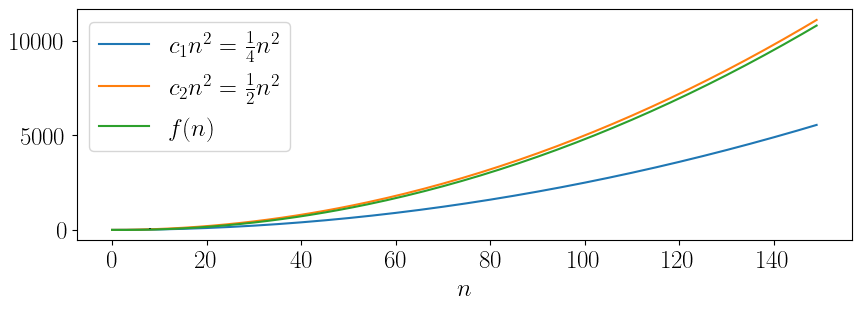

In [23]:
n = np.arange(150)
plt.plot(n, 0.25*n**2, label=r'$c_1 n^2=\frac{1}{4} n^2$')
plt.plot(n, 0.5*n**2, label=r'$c_2 n^2 = \frac{1}{2} n^2$')
plt.plot([8, 8], [0, 100], 'k--')
plt.plot(n, 0.5*n**2-2*n, label=r'$f(n)$')
plt.xlabel(r'$n$')
plt.legend();

### $O$, $\Omega$ and $\Theta$ in equations

- In equations, $\Theta(g(n))$ stands for any function from this set

$$2n^2 + 3n + 1 = 2n^2 + \Theta(n)$$

means

$$2n^2 + 3n + 1 = 2n^2 + f(n)$$

for some $f(n)\in \Theta(n)$; we just don't care about the details and don't even want to name the function.

- If asymptotic expressions appear on both sides, e.g.,

$$2n^2+\Theta(n) = \Theta(n^2)$$

we interprete this as saying: for any $f(n)\in\Theta(n)$ on the left-hand side, there is a $g(n)\in\Theta(n^2)$, so that $2n^2+f(n)=g(n)$.

- In particular, we can simplify

$$2n^2+3n+1 = 2n^2+\Theta(n) = \Theta(n^2)\;.$$

### Properties of asymptotic functions

#### Transitivity ($\Theta$, $O$, $\Omega$)

$$f(n) = \Theta(g(n)) \wedge g(n)=\Theta(h(n)) \implies f(n)=\Theta(h(n))$$

#### Reflexivity ($\Theta$, $O$, $\Omega$)

$$f(n) = \Theta(f(n))$$

#### Symmetry ($\Theta$)

$$f(n) = \Theta(g(n)) \iff g(n) = \Theta(f(n))$$

#### Transpose symmetry ($O$, $\Omega$; $o$, $\omega$)

\begin{align}
f(n) = O(g(n)) &\iff g(n) = \Omega(f(n)) 
\end{align}

#### Comparison
We have roughly

|$\leq$|$=$|$\geq$|
|-|-|-|
|$O$|$\Theta$|$\Omega$|

**Note**: For numbers $a$ and $b$, one of the following must be true: $a<b$, $a=b$ or $a>b$. For functions, this may be undecided.

##### Example

The function

$$f(n) = n^{1+\sin n}$$

is neither asymptotically larger nor asymptotically smaller than $g(n) = n$ because the exponent in $f(n)$ varies between 0 and 2.

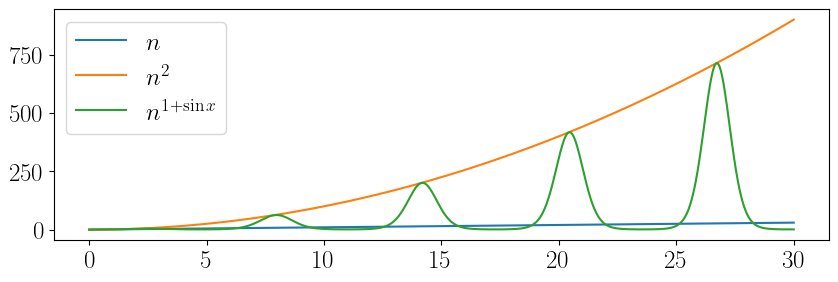

In [25]:
x = np.linspace(0, 30, num=1000)
plt.plot(x, x, label='$n$');
plt.plot(x, x**2, label='$n^2$');
plt.plot(x, x**(1+np.sin(x)), label='$n^{1+\sin x}$');
plt.legend();

------